# Selección automática de variables para regresión lineal Datos Vino


In [39]:
# Cargar las funciones
exec(open(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\NuestrasFunciones.py').read())

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
pd.set_option("display.max_columns", None)

Leer los datos depurados y con las transformaciones creadas en el código de regresión lineal

In [41]:
# Leer datos depurados datosvinoDep
todo_cont = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\script_base_vinos_sel_var\todo_cont_cor.csv', index_col=0)

# Descriptivo de comprobación
todo_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Acidez               4998 non-null   float64
 1   AcidoCitrico         4998 non-null   float64
 2   Azucar               4998 non-null   float64
 3   CloruroSodico        4998 non-null   float64
 4   Densidad             4998 non-null   float64
 5   pH                   4998 non-null   float64
 6   Sulfatos             4998 non-null   float64
 7   Alcohol              4998 non-null   float64
 8   CalifProductor       4998 non-null   int64  
 9   PrecioBotella        4998 non-null   float64
 10  Etiqueta             4998 non-null   object 
 11  Clasificacion        4998 non-null   object 
 12  Region               4998 non-null   float64
 13  prop_missings        4998 non-null   float64
 14  aleatorio            4998 non-null   float64
 15  aleatorio2           4998 non-null   float6

In [42]:
# Eliminar los aleatorios para aligerar
todo_cont = todo_cont.loc[:,~todo_cont.columns.str.contains('aleat', case=False)]
todo_cont.head()

,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings,Acidez_sqr,AcidoCitrico_exp,Azucar_sqr,CloruroSodico_log,Densidad_raiz4,pH_sqrt,Sulfatos_sqr,Alcohol_sqrt,CalifProductor_sqrt,PrecioBotella_sqr,Beneficio
0,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,17.3,2,1.00,M,***,1.0,7.692308,8.309692,5.573396,13.807849,0.457270,1.452933,1.827351,10.609809,2.205626,1.364559,1.000000e-08,515
1,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,M,***,3.0,0.000000,37.422272,5.132738,11.404140,1.113573,1.334062,1.717016,9.120357,2.487248,1.671222,2.603468e+00,585
2,-1.22,0.34,1.40,0.040,1.03236,3.20,0.48,11.6,2,6.23,B,***,2.0,7.692308,1.172213,21.566661,8.851412,1.116693,1.466976,1.751706,9.120357,1.806092,1.364559,1.257107e+01,775
3,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,R,Desc,2.0,0.000000,9.157458,49.727992,10.696407,1.066658,1.338271,2.381296,7.743506,2.053785,0.964915,9.531440e-01,596
4,-0.22,0.39,1.80,-0.277,0.94724,3.09,0.75,12.6,3,4.31,R,****,2.0,0.000000,5.697821,22.873545,8.922936,0.717455,1.063663,1.703825,10.964024,1.882330,1.671222,5.035461e+00,1083


In [43]:
todo_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Acidez               4998 non-null   float64
 1   AcidoCitrico         4998 non-null   float64
 2   Azucar               4998 non-null   float64
 3   CloruroSodico        4998 non-null   float64
 4   Densidad             4998 non-null   float64
 5   pH                   4998 non-null   float64
 6   Sulfatos             4998 non-null   float64
 7   Alcohol              4998 non-null   float64
 8   CalifProductor       4998 non-null   int64  
 9   PrecioBotella        4998 non-null   float64
 10  Etiqueta             4998 non-null   object 
 11  Clasificacion        4998 non-null   object 
 12  Region               4998 non-null   float64
 13  prop_missings        4998 non-null   float64
 14  Acidez_sqr           4998 non-null   float64
 15  AcidoCitrico_exp     4998 non-null   float6

## Preparación de los datos
 
Como siempre, sacamos la variable objetivo para tenerla controlada y creamos el input. Como en esta ocasión vamos a trabajar más con el paradigma modelización mediante X,y, necesitaremos generar explítcitamente la matriz de diseño total con las categóricas extendidas en dummies y con constante. Vamos a hacerlo de forma manual. 
 


In [44]:
# Sacar la variable objetivo
varObjCont = todo_cont.Beneficio
imput = todo_cont.drop(['Beneficio'],axis=1)

# Crear matriz de diseño 
imput_dummy = pd.get_dummies(imput, columns=['Clasificacion', 'Etiqueta', 'Region'], drop_first=False)

imput_dummy.head()

,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,prop_missings,Acidez_sqr,AcidoCitrico_exp,Azucar_sqr,CloruroSodico_log,Densidad_raiz4,pH_sqrt,Sulfatos_sqr,Alcohol_sqrt,CalifProductor_sqrt,PrecioBotella_sqr,Clasificacion_*,Clasificacion_**,Clasificacion_***,Clasificacion_****,Clasificacion_Desc,Etiqueta_B,Etiqueta_M,Etiqueta_MB,Etiqueta_MM,Etiqueta_R,Region_1.0,Region_2.0,Region_3.0
0,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,17.3,2,1.00,7.692308,8.309692,5.573396,13.807849,0.457270,1.452933,1.827351,10.609809,2.205626,1.364559,1.000000e-08,False,False,True,False,False,False,True,False,False,False,True,False,False
1,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,0.000000,37.422272,5.132738,11.404140,1.113573,1.334062,1.717016,9.120357,2.487248,1.671222,2.603468e+00,False,False,True,False,False,False,True,False,False,False,False,False,True
2,-1.22,0.34,1.40,0.040,1.03236,3.20,0.48,11.6,2,6.23,7.692308,1.172213,21.566661,8.851412,1.116693,1.466976,1.751706,9.120357,1.806092,1.364559,1.257107e+01,False,False,True,False,False,True,False,False,False,False,False,True,False
3,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,0.000000,9.157458,49.727992,10.696407,1.066658,1.338271,2.381296,7.743506,2.053785,0.964915,9.531440e-01,False,False,False,False,True,False,False,False,False,True,False,True,False
4,-0.22,0.39,1.80,-0.277,0.94724,3.09,0.75,12.6,3,4.31,0.000000,5.697821,22.873545,8.922936,0.717455,1.063663,1.703825,10.964024,1.882330,1.671222,5.035461e+00,False,False,False,True,False,False,False,False,False,True,False,True,False


In [45]:
imput_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Acidez               4998 non-null   float64
 1   AcidoCitrico         4998 non-null   float64
 2   Azucar               4998 non-null   float64
 3   CloruroSodico        4998 non-null   float64
 4   Densidad             4998 non-null   float64
 5   pH                   4998 non-null   float64
 6   Sulfatos             4998 non-null   float64
 7   Alcohol              4998 non-null   float64
 8   CalifProductor       4998 non-null   int64  
 9   PrecioBotella        4998 non-null   float64
 10  prop_missings        4998 non-null   float64
 11  Acidez_sqr           4998 non-null   float64
 12  AcidoCitrico_exp     4998 non-null   float64
 13  Azucar_sqr           4998 non-null   float64
 14  CloruroSodico_log    4998 non-null   float64
 15  Densidad_raiz4       4998 non-null   float6

In [46]:
# Borrar los niveles que se quieren como referencia (se incluirá su efecto implicito en las constante)
imput_dummy.drop(['Etiqueta_MM','Clasificacion_*','Region_1.0'], axis=1, inplace=True)

# Añadir constante
imput_dummy=sm.add_constant(imput_dummy)

imput_dummy.head()

,const,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,prop_missings,Acidez_sqr,AcidoCitrico_exp,Azucar_sqr,CloruroSodico_log,Densidad_raiz4,pH_sqrt,Sulfatos_sqr,Alcohol_sqrt,CalifProductor_sqrt,PrecioBotella_sqr,Clasificacion_**,Clasificacion_***,Clasificacion_****,Clasificacion_Desc,Etiqueta_B,Etiqueta_M,Etiqueta_MB,Etiqueta_R,Region_2.0,Region_3.0
0,1.0,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,17.3,2,1.00,7.692308,8.309692,5.573396,13.807849,0.457270,1.452933,1.827351,10.609809,2.205626,1.364559,1.000000e-08,False,True,False,False,False,True,False,False,False,False
1,1.0,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,0.000000,37.422272,5.132738,11.404140,1.113573,1.334062,1.717016,9.120357,2.487248,1.671222,2.603468e+00,False,True,False,False,False,True,False,False,False,True
2,1.0,-1.22,0.34,1.40,0.040,1.03236,3.20,0.48,11.6,2,6.23,7.692308,1.172213,21.566661,8.851412,1.116693,1.466976,1.751706,9.120357,1.806092,1.364559,1.257107e+01,False,True,False,False,True,False,False,False,True,False
3,1.0,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,0.000000,9.157458,49.727992,10.696407,1.066658,1.338271,2.381296,7.743506,2.053785,0.964915,9.531440e-01,False,False,False,True,False,False,False,True,True,False
4,1.0,-0.22,0.39,1.80,-0.277,0.94724,3.09,0.75,12.6,3,4.31,0.000000,5.697821,22.873545,8.922936,0.717455,1.063663,1.703825,10.964024,1.882330,1.671222,5.035461e+00,False,False,True,False,False,False,False,True,True,False


In [47]:
imput_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                4998 non-null   float64
 1   Acidez               4998 non-null   float64
 2   AcidoCitrico         4998 non-null   float64
 3   Azucar               4998 non-null   float64
 4   CloruroSodico        4998 non-null   float64
 5   Densidad             4998 non-null   float64
 6   pH                   4998 non-null   float64
 7   Sulfatos             4998 non-null   float64
 8   Alcohol              4998 non-null   float64
 9   CalifProductor       4998 non-null   int64  
 10  PrecioBotella        4998 non-null   float64
 11  prop_missings        4998 non-null   float64
 12  Acidez_sqr           4998 non-null   float64
 13  AcidoCitrico_exp     4998 non-null   float64
 14  Azucar_sqr           4998 non-null   float64
 15  CloruroSodico_log    4998 non-null   float6

## Modelo manual ganador

In [48]:
# Importar la api para fórmulas (en concreto ols para regresión)
from statsmodels.formula.api import ols 

# Ajustar regresión de ejemplo
results = ols('Beneficio ~ Etiqueta + Clasificacion + CalifProductor + Acidez + Alcohol',data=todo_cont).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Beneficio   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     347.7
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:20:08   Log-Likelihood:                -32698.
No. Observations:                4998   AIC:                         6.542e+04
Df Residuals:                    4986   BIC:                         6.550e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               646.0848     11.600     55.697      0.000     623.344     668.826
Etiqueta[T.M]          -261.7659      7.250    -36.106      0.000    -275.979    -247.553
Etiqueta[T.MB]          109.5192     13.572      8.070      0.000      82.912     136.126
Etiqueta[T.MM]         -385.2714     13.125    -29.354      0.000    -411.002    -359.541
Etiqueta[T.R]          -129.5290      6.252    -20.718      0.000    -141.786    -117.272
Clasificacion[T.**]      46.1538      6.383      7.231      0.000      33.641      58.667
Clasificacion[T.***]    104.2643      7.328     14.228      0.000      89.898     118.631
Clasificacion[T.****]   188.2054     11.032     17.059      0.000     166.577     209.834
Clasificacion[T.Desc]   -21.2479      8.108     -2.621      0.009     -37.143      -5.353
CalifProductor           -8.4463      2.217     -3.810      0.000     -12.793      -4.100
Acidez                   -7.3351      3.104     -2.363      0.018     -13.420      -1.250
Alcohol                   3.8803      0.671      5.782      0.000       2.565       5.196
==============================================================================
Omnibus:                      131.847   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.976
Skew:                           0.412   Prob(JB):                     1.48e-31
Kurtosis:                       3.047   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Selección secuencial de variables

In [49]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

## Método backward-best

In [50]:
clf = LinearRegression()

# Definir el selector de variables
sfs_back = sfs(clf,k_features = 'best',forward=False,floating=False, scoring='r2',cv=5)

# Ajustar a los datos
sfs_back = sfs_back.fit(imput_dummy, varObjCont)

#print(sfs1.subsets_)

# Ver nombres de variables seleccionadas
print(sfs_back.k_feature_names_)

# Score po cv
sfs_back.k_score_

('const', 'prop_missings', 'Acidez_sqr', 'Azucar_sqr', 'Alcohol_sqrt', 'CalifProductor_sqrt', 'Clasificacion_**', 'Clasificacion_***', 'Clasificacion_****', 'Clasificacion_Desc', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R', 'Region_2.0')


0.4320393461774342

In [51]:
# Proceso backkward
pd.DataFrame.from_dict(sfs_back.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4487054869171673, 0.4160351378789179, 0.413...",0.42857,"(const, Acidez, AcidoCitrico, Azucar, CloruroS...",0.016771,0.013049,0.006524
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.4486227504702345, 0.41911986960265357, 0.41...",0.429237,"(const, Acidez, AcidoCitrico, Azucar, CloruroS...",0.015872,0.012349,0.006174
30,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15...","[0.44858837112696603, 0.41987756312391644, 0.4...",0.429614,"(const, AcidoCitrico, Azucar, CloruroSodico, D...",0.015785,0.012281,0.00614
29,"(0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[0.44878704036839645, 0.4198526794540107, 0.41...",0.429946,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.015833,0.012319,0.006159
28,"(0, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, ...","[0.44929745209040395, 0.4202915968794242, 0.41...",0.430259,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.015888,0.012362,0.006181
27,"(0, 2, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17,...","[0.4493174487661802, 0.4207933969055797, 0.415...",0.430498,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.015858,0.012338,0.006169
26,"(0, 2, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17,...","[0.44952999916220127, 0.42089414912068546, 0.4...",0.430694,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.015844,0.012327,0.006163
25,"(0, 2, 4, 5, 6, 7, 10, 11, 12, 14, 16, 17, 19,...","[0.4494568823302556, 0.4209734560801799, 0.415...",0.430876,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.015738,0.012245,0.006122
24,"(0, 2, 4, 5, 6, 7, 10, 11, 12, 14, 17, 19, 20,...","[0.44943233055633813, 0.42095565204236873, 0.4...",0.431017,"(const, AcidoCitrico, CloruroSodico, Densidad,...",0.01571,0.012223,0.006111
23,"(0, 2, 4, 6, 7, 10, 11, 12, 14, 17, 19, 20, 21...","[0.44934553459142745, 0.4208675158906807, 0.41...",0.431184,"(const, AcidoCitrico, CloruroSodico, pH, Sulfa...",0.015352,0.011945,0.005972


### Visualicación del proceso de selección de variables

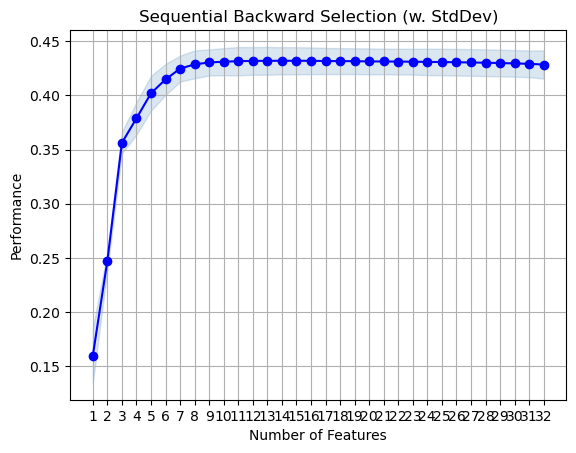

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs_back.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

## Método forward-parsimonious

In [53]:
# Sequential Forward Selection
sfs_forw = sfs(clf, 
          k_features='parsimonious', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5, n_jobs=-1)

sfs_forw = sfs_forw.fit(imput_dummy, varObjCont)

print('\nSequential Forward Selection:')
print(sfs_forw.k_feature_names_)
print('CV Score:')
print(sfs_forw.k_score_)


Sequential Forward Selection:
('Alcohol_sqrt', 'CalifProductor_sqrt', 'Clasificacion_**', 'Clasificacion_***', 'Clasificacion_****', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R')
CV Score:
0.43048986718051135


In [54]:
# Proceso forkward
pd.DataFrame.from_dict(sfs_forw.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(26,)","[0.16725115767617382, 0.1832786016559066, 0.11...",0.159645,"(Etiqueta_B,)",0.032475,0.025266,0.012633
2,"(26, 28)","[0.2352470110520195, 0.25589865536677636, 0.24...",0.247218,"(Etiqueta_B, Etiqueta_MB)",0.010441,0.008123,0.004062
3,"(26, 28, 29)","[0.3699222634754472, 0.3523319144660504, 0.340...",0.35626,"(Etiqueta_B, Etiqueta_MB, Etiqueta_R)",0.012648,0.00984,0.00492
4,"(24, 26, 28, 29)","[0.4075248017272165, 0.3688272326765002, 0.365...",0.378857,"(Clasificacion_****, Etiqueta_B, Etiqueta_MB, ...",0.019387,0.015083,0.007542
5,"(23, 24, 26, 28, 29)","[0.4205827755389515, 0.3873870569220764, 0.379...",0.402087,"(Clasificacion_***, Clasificacion_****, Etique...",0.020642,0.016061,0.00803
6,"(23, 24, 26, 27, 28, 29)","[0.4312504517888599, 0.4041950026130672, 0.394...",0.414812,"(Clasificacion_***, Clasificacion_****, Etique...",0.018434,0.014342,0.007171
7,"(22, 23, 24, 26, 27, 28, 29)","[0.44218875527986146, 0.4176247136363396, 0.40...",0.424791,"(Clasificacion_**, Clasificacion_***, Clasific...",0.015394,0.011977,0.005988
8,"(19, 22, 23, 24, 26, 27, 28, 29)","[0.44989881419832933, 0.41948238244797287, 0.4...",0.428756,"(Alcohol_sqrt, Clasificacion_**, Clasificacion...",0.016594,0.012911,0.006455
9,"(19, 20, 22, 23, 24, 26, 27, 28, 29)","[0.4488195563367179, 0.42001718366659835, 0.41...",0.43049,"(Alcohol_sqrt, CalifProductor_sqrt, Clasificac...",0.015477,0.012042,0.006021
10,"(12, 19, 20, 22, 23, 24, 26, 27, 28, 29)","[0.45049170389359483, 0.42112790694357893, 0.4...",0.431186,"(Acidez_sqr, Alcohol_sqrt, CalifProductor_sqrt...",0.016139,0.012556,0.006278


## Método backward-12 variables



In [55]:
# Sequential Forward Selection
sfs_12 = sfs(clf, 
          k_features= 12, 
          forward=False, 
          floating=True, 
          scoring='r2',
          cv=5)

sfs_12 = sfs_12.fit(imput_dummy, varObjCont)

print('\nSequential Forward Selection (k=12):')
print(sfs_12.k_feature_names_)
print('CV Score:')
print(sfs_12.k_score_)


Sequential Forward Selection (k=12):
('Acidez_sqr', 'Alcohol_sqrt', 'CalifProductor_sqrt', 'Clasificacion_**', 'Clasificacion_***', 'Clasificacion_****', 'Clasificacion_Desc', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R', 'Region_2.0')
CV Score:
0.43193579693750983


## Método backward-10 variables



In [56]:
# Sequential Forward Selection
sfs_10 = sfs(clf, 
          k_features= 10, 
          forward=False, 
          floating=True, 
          scoring='r2',
          cv=5, n_jobs=-1)

sfs_10 = sfs_10.fit(imput_dummy, varObjCont)

print('\nSequential Backward Selection (k=10):')
print(sfs_10.k_feature_names_)
print('CV Score:')
print(sfs_10.k_score_)


Sequential Backward Selection (k=10):
('Acidez_sqr', 'Alcohol_sqrt', 'CalifProductor_sqrt', 'Clasificacion_**', 'Clasificacion_***', 'Clasificacion_****', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R')
CV Score:
0.4311856248530804


## Comparación por validación cruzada

In [57]:
# Crear lista de fórmulas   
list_sfs = [sfs_back,sfs_forw,sfs_12,sfs_10]
list_sfs

# Aplicar a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_selectVar(x,imput_dummy,varObjCont, seed=2022),list_sfs))

# Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','R2']
results.head()

Métrica r2: 0.431 (0.018)
Métrica r2: 0.430 (0.018)
Métrica r2: 0.431 (0.018)
Métrica r2: 0.430 (0.018)


,Modelo,R2
0,0,0.400742
1,0,0.458828
2,0,0.393625
3,0,0.426879
4,0,0.457909


In [58]:
results

,Modelo,R2
0,0,0.400742
1,0,0.458828
2,0,0.393625
3,0,0.426879
4,0,0.457909
...,...,...
395,3,0.414663
396,3,0.443186
397,3,0.439176
398,3,0.401339


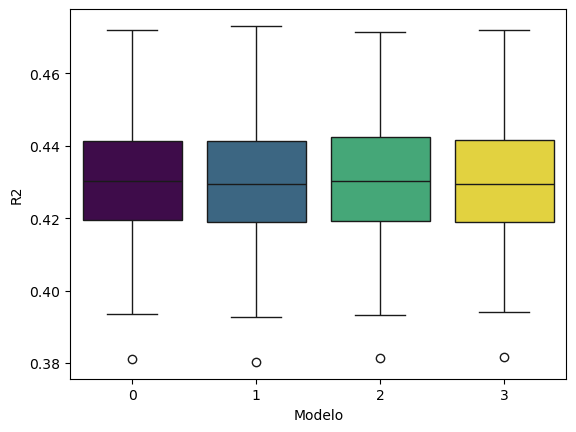

In [60]:
# Boxplot paralelo para comparar
sns.boxplot(x='Modelo', y='R2', data=results, palette='viridis', hue='Modelo', legend=False)
plt.show()

## Creación de interacciones

In [61]:
# Generarar el dataset con las interacciones de todas las variables y posteriormente pasar los métodos de selección para hacer una criba de efectos interesantes 
sel_col = ['const', 'CalifProductor', 
        'Acidez_sqr', 'Alcohol_sqrt', 'Clasificacion_**', 'Clasificacion_***', 'Clasificacion_****', 
        'Clasificacion_Desc', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 
        'Etiqueta_R', 'Region_2.0']

imput_dummy_red = imput_dummy[sel_col].drop(['const'], axis=1)
imput_dummy_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CalifProductor      4998 non-null   int64  
 1   Acidez_sqr          4998 non-null   float64
 2   Alcohol_sqrt        4998 non-null   float64
 3   Clasificacion_**    4998 non-null   bool   
 4   Clasificacion_***   4998 non-null   bool   
 5   Clasificacion_****  4998 non-null   bool   
 6   Clasificacion_Desc  4998 non-null   bool   
 7   Etiqueta_B          4998 non-null   bool   
 8   Etiqueta_M          4998 non-null   bool   
 9   Etiqueta_MB         4998 non-null   bool   
 10  Etiqueta_R          4998 non-null   bool   
 11  Region_2.0          4998 non-null   bool   
dtypes: bool(9), float64(2), int64(1)
memory usage: 200.1 KB


In [62]:
# Obtener interacciones de manera automática, sklearn proporciona la función PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

# Crear términos de interacción (interacción de cada par de regresores + polinomio)
# Los términos de interacción deben crearse tanto en el conjunto de datos de prueba como en el de entrenamiento
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction

# Aplicar al dataset
X_inter = pd.DataFrame(interaction.fit_transform(imput_dummy_red), columns=interaction.get_feature_names_out(input_features=imput_dummy_red.columns))
X_inter.shape

(4998, 78)

In [63]:
# Eliminar columnas constantes con varianza 0 del dataset (interacciones sin sentido)
X_inter = X_inter.loc[:, X_inter.var() != 0.0]

X_inter.shape

(4998, 66)

Se tiene el dataset con variables originales + transformaciones + interacciones interesantes de orden 2

## Selección secuencial con interacciones

### Mejor configuración

In [64]:
# Sequential Forward Selection
sfs_forw_int_best = sfs(clf, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4,n_jobs=-1)

sfs_forw_int_best = sfs_forw_int_best.fit(X_inter, varObjCont)

print('\nSequential Forward + Best Selection:')
print(sfs_forw_int_best.k_feature_names_)
print('CV Score:')
print(sfs_forw_int_best.k_score_)


Sequential Forward + Best Selection:
('Clasificacion_***', 'Clasificacion_****', 'Clasificacion_Desc', 'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R', 'CalifProductor Acidez_sqr', 'CalifProductor Clasificacion_Desc', 'CalifProductor Etiqueta_R', 'Acidez_sqr Clasificacion_**', 'Acidez_sqr Clasificacion_Desc', 'Alcohol_sqrt Clasificacion_**', 'Alcohol_sqrt Clasificacion_***', 'Alcohol_sqrt Clasificacion_Desc', 'Alcohol_sqrt Etiqueta_B', 'Alcohol_sqrt Etiqueta_M', 'Alcohol_sqrt Etiqueta_R', 'Clasificacion_** Etiqueta_B', 'Clasificacion_** Etiqueta_M', 'Clasificacion_** Etiqueta_R', 'Clasificacion_**** Region_2.0', 'Clasificacion_Desc Etiqueta_B', 'Clasificacion_Desc Etiqueta_M', 'Clasificacion_Desc Etiqueta_MB', 'Clasificacion_Desc Etiqueta_R', 'Clasificacion_Desc Region_2.0', 'Etiqueta_B Region_2.0', 'Etiqueta_M Region_2.0')
CV Score:
0.4359173953765334


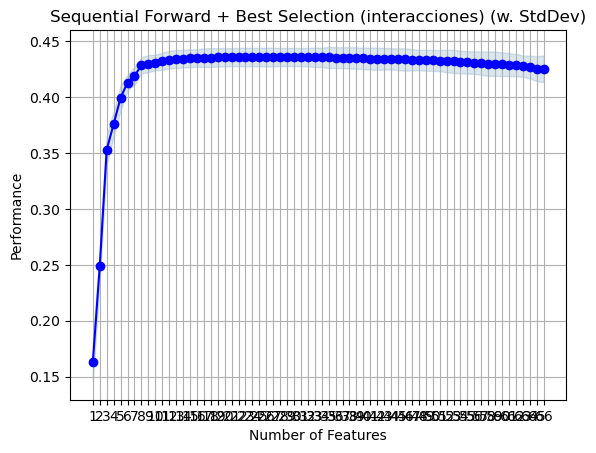

In [65]:
fig1 = plot_sfs(sfs_forw_int_best.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward + Best Selection (interacciones) (w. StdDev)')
plt.grid()
plt.show()

### Configuración con 10 variables



In [66]:
# Sequential Forward Selection
sfs_forw_int_10 = sfs(clf, 
          k_features=10, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4,n_jobs=-1)

sfs_forw_int_10 = sfs_forw_int_10.fit(X_inter, varObjCont)

print('\nSequential Forward 10 variables Selection:')
print(sfs_forw_int_10.k_feature_names_)
print('CV Score:')
print(sfs_forw_int_10.k_score_)


Sequential Forward 10 variables Selection:
('Clasificacion_***', 'Clasificacion_****', 'Etiqueta_B', 'Etiqueta_MB', 'Etiqueta_R', 'CalifProductor Acidez_sqr', 'Alcohol_sqrt Clasificacion_**', 'Alcohol_sqrt Etiqueta_B', 'Alcohol_sqrt Etiqueta_M', 'Clasificacion_Desc Etiqueta_MB')
CV Score:
0.4309195692039667


# Selección de variables por LASSO

Se explora la selección de variables por modelo Laso con criterios AIC o BIC

## Solo efectos principales

Aplicación de Lasso al dataset con variables originales + transformaciones

Para hacer la selección por Lasso y obtener la matriz de efecto seleccionados solamente, sencillamente eliminamos todos los coeficientes con parámetro estimado nulo haciendo una selección por columnas. 



In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC

# Escalar las variables predictoras
scaler = StandardScaler()
imput_dummy_scaled = scaler.fit_transform(imput_dummy)

# Crear el modelo (sin el parámetro 'normalize')
reg = LassoLarsIC(criterion='bic')

# Ajustar el modelo
reg.fit(imput_dummy_scaled, varObjCont)

# Imprimir los coeficientes
print(reg.coef_)

[  0.           0.           0.          -0.98441662  -0.41125703
   0.           0.           0.           0.           0.
   0.           1.71653149  -4.86140984   0.           0.
   0.           0.           0.           0.          12.13349945
  -7.98006415   0.          19.94854808  41.26418531  44.70840802
  -7.94401271 136.43295558  26.13553665  79.21463335  96.28630415
   3.08611743  -0.21291685]


In [76]:
selec_feats = imput_dummy[imput_dummy.columns[(reg.coef_ != 0).ravel().tolist()]]
selec_feats.columns

Index(['Azucar', 'CloruroSodico', 'prop_missings', 'Acidez_sqr',
       'Alcohol_sqrt', 'CalifProductor_sqrt', 'Clasificacion_**',
       'Clasificacion_***', 'Clasificacion_****', 'Clasificacion_Desc',
       'Etiqueta_B', 'Etiqueta_M', 'Etiqueta_MB', 'Etiqueta_R', 'Region_2.0',
       'Region_3.0'],
      dtype='object')

## Lasso con interacciones

Aplicar Lasso al archivo que contiene también las interacciones entre las variables de interés

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC

# Escalar las variables predictoras
scaler = StandardScaler()
X_inter_scaled = scaler.fit_transform(X_inter)

# Crear el modelo sin el argumento 'normalize'
lasso_int = LassoLarsIC(criterion='bic')

# Ajustar el modelo
lasso_int.fit(X_inter_scaled, varObjCont)

# Imprimir los coeficientes
print(lasso_int.coef_)


[-7.50534263 -5.39398375  0.          0.         40.39395457 28.98947104
  0.         92.52392094  0.         76.63015148 79.43136907  0.
  0.          0.          0.          0.          7.66772316 -9.73509586
  0.          2.48061149  3.2567864   0.          0.          0.
 -1.19772004  0.          7.86304746 -5.10766452  0.          0.
  0.          2.14836426  0.         22.65705552  0.          0.
  0.         42.95189915 29.71658997  0.         21.12492374  0.
  0.          0.          0.7903918   0.          1.09399516  4.47872091
  1.85598407  0.          0.          0.          2.71231783  1.19013128
  0.          0.          3.57007206  8.82043779  0.          7.25778661
  0.75892375  2.23158888  3.38502079  0.          0.          0.65971941]


Obtener la sub selección de la misma forma

In [81]:
selec_feats_int = X_inter[X_inter.columns[(lasso_int.coef_ != 0).ravel().tolist()]]
selec_feats_int.columns

Index(['CalifProductor', 'Acidez_sqr', 'Clasificacion_***',
       'Clasificacion_****', 'Etiqueta_B', 'Etiqueta_MB', 'Etiqueta_R',
       'CalifProductor Clasificacion_****',
       'CalifProductor Clasificacion_Desc', 'CalifProductor Etiqueta_M',
       'CalifProductor Etiqueta_MB', 'Acidez_sqr Clasificacion_**',
       'Acidez_sqr Clasificacion_****', 'Acidez_sqr Clasificacion_Desc',
       'Acidez_sqr Etiqueta_R', 'Alcohol_sqrt Clasificacion_**',
       'Alcohol_sqrt Etiqueta_B', 'Alcohol_sqrt Etiqueta_M',
       'Alcohol_sqrt Etiqueta_R', 'Clasificacion_** Etiqueta_MB',
       'Clasificacion_** Region_2.0', 'Clasificacion_*** Etiqueta_B',
       'Clasificacion_*** Etiqueta_M', 'Clasificacion_**** Etiqueta_B',
       'Clasificacion_**** Etiqueta_M', 'Clasificacion_**** Region_2.0',
       'Clasificacion_Desc Etiqueta_B', 'Clasificacion_Desc Etiqueta_MB',
       'Clasificacion_Desc Etiqueta_R', 'Clasificacion_Desc Region_2.0',
       'Etiqueta_B Region_2.0', 'Etiqueta_R Region_2.0']

## Validación Cruzada para interacciones

Vamos a aplicar la validación cruzada repetida para los modelos de selección atuomática sfs y Lasso para obtener los valores de sesgo-varianza de las estimaciones. Como siempre, creamos lista de modelos y aplicamos con map la función **cross_val_selectVar** a toda la lista, obteniendo un dataframe con Modelo y Valores de R2 en cv (100 valores por modelo). Luego agrupación y cuentas y boxplot.


In [ ]:
list_sfs = [sfs_forw_int_best,sfs_forw_int_10,selec_feats,selec_feats_int]
list_sfs


# Aplicar a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_selectVar(x,X_inter_scaled,varObjCont, seed=2022),list_sfs))

# Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results_inter = list_res.T.melt()
results_inter.columns = ['Modelo','R2']
results_inter.head()


Métrica r2: 0.432 (0.019)
Métrica r2: 0.430 (0.018)
Métrica r2: 0.430 (0.018)
Métrica r2: 0.431 (0.019)


,Modelo,R2
0,0,0.401341
1,0,0.461523
2,0,0.399108
3,0,0.420741
4,0,0.462401


In [85]:
# Medias por Modelo (sesgo)
print(results_inter.groupby(['Modelo']).mean())

# Desviaciones por modelo (varianza)
results_inter.groupby(['Modelo']).std()

              R2
Modelo          
0       0.432239
1       0.430365
2       0.430320
3       0.431195


,R2
Modelo,
0,0.019174
1,0.018272
2,0.018337
3,0.018988


<Axes: xlabel='Modelo', ylabel='R2'>

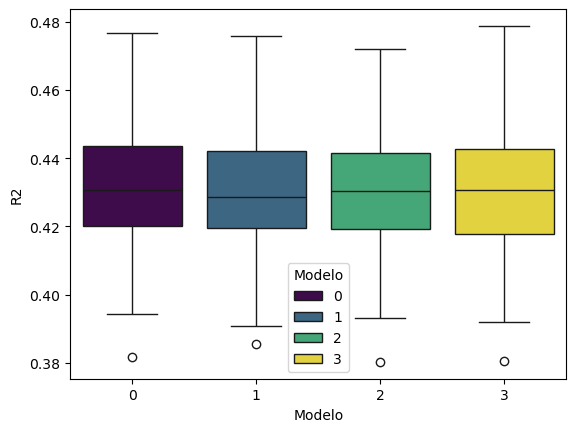

In [88]:
# Boxplot paralelo para comparar
sns.boxplot(x='Modelo',y='R2',data=results_inter,palette='viridis',hue='Modelo')

# Comparativa final 

Resumimos la comparativa de capacidad predictiva de: 

- Modelos sfs para variables originales + transformaciones
- Modelos sfs y Lasso para variables originales + transformaciones + interacciones


In [89]:
# Medias por Modelo (sesgo)
print(results.groupby(['Modelo']).mean())
results_inter.groupby(['Modelo']).mean()

              R2
Modelo          
0       0.430652
1       0.429611
2       0.430816
3       0.430168


,R2
Modelo,
0,0.432239
1,0.430365
2,0.430320
3,0.431195


Poca diferencia entre ellos. Se elige el modelo más simple

In [90]:
modeloManual = cross_val_lin('Beneficio ~ Etiqueta + Clasificacion + CalifProductor + Acidez + Alcohol', data=todo_cont, seed=2022)

Modelo: Beneficio ~ Etiqueta + Clasificacion + CalifProductor + Acidez + Alcohol
Coeficiente de determinación R2: 0.430 (0.018)


En este caso, las transformaciones e interacciones no aportan gran ganacia respecto a la consideración de modelo manual, por lo que no parece que merezca la pena introducir estos efectos que hacen el modelo más complejo para su interpretación. Conclusión, el mejor modelo parece ser el manual en cuanto a parsimonia. En otras ocasiones, es muy posible que extendiendo el set de variables con la consideración de interacciones y transformadas de variables aumente la capacidad predictiva de los modelos. Un par de alternativas para la selección de variables de cara a la modelización predictiva son los Random Forest y Gradient Boosting.
